<a href="https://colab.research.google.com/github/akashgardas/Machine-Learning/blob/main/Assignments/Walmart_Sales_Forecasting_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

## Load datasets

Task 1 — Data Loading, Merging & Initial Inspection
1. Load all required CSV files into your notebook.
2. Merge them into one dataset using Store, Dept, and Date.
3. Display the first and last 10 rows.
4. Print:
  `.shape`
  `.info()`
  `.describe()`
5. Identify:
  - Numerical columns
  - Categorical columns
  - Date columns
6. List all unique store types and departments.
7. Identify which columns may require cleaning or type conversion

In [2]:
# loading datasets
df_features = pd.read_csv('drive/MyDrive/Tek works/Walmart sales forecasting datasets/features.csv')
df_stores = pd.read_csv('drive/MyDrive/Tek works/Walmart sales forecasting datasets/stores.csv')
df_sales = pd.read_csv('drive/MyDrive/Tek works/Walmart sales forecasting datasets/train.csv')

In [3]:
df_features.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [4]:
df_features.shape

(8190, 12)

In [5]:
df_stores.columns

Index(['Store', 'Type', 'Size'], dtype='object')

In [6]:
df_stores.shape

(45, 3)

In [7]:
df_sales.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [8]:
df_sales.shape

(421570, 5)

In [9]:
# merge features and stores
df = pd.merge(df_features, df_stores, on='Store')

In [10]:
# merge df and df_sales
df = pd.merge(df, df_sales, on=['Store', 'Date', 'IsHoliday'])

In [11]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2,50605.27
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3,13740.12
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4,39954.04
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,32229.38


In [12]:
df.shape

(421570, 16)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   Temperature   421570 non-null  float64
 3   Fuel_Price    421570 non-null  float64
 4   MarkDown1     150681 non-null  float64
 5   MarkDown2     111248 non-null  float64
 6   MarkDown3     137091 non-null  float64
 7   MarkDown4     134967 non-null  float64
 8   MarkDown5     151432 non-null  float64
 9   CPI           421570 non-null  float64
 10  Unemployment  421570 non-null  float64
 11  IsHoliday     421570 non-null  bool   
 12  Type          421570 non-null  object 
 13  Size          421570 non-null  int64  
 14  Dept          421570 non-null  int64  
 15  Weekly_Sales  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [14]:
df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739,44.260317,15981.258123
std,12.785297,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328,30.492054,22711.183519
min,1.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000,1.000000,-4988.940000
25%,11.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000,18.000000,2079.650000
50%,22.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000,37.000000,7612.030000
75%,33.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000,74.000000,20205.852500
max,45.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,99.000000,693099.360000


### Inspecting Columns
- Numeric columns: Temperature, Fuel_Price, MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5, CPI, Unemployment, Size, Weekly_Sales
- Categorical columns: Store, Type, Dept
- Date column: Date

In [15]:
# unique store types
df['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [16]:
# unique departments
df['Dept'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 79, 80, 81, 82, 83, 85, 87, 90, 91, 92,
       93, 94, 95, 97, 98, 78, 96, 99, 77, 39, 50, 43, 65])

**Insights**
- Different types of columns are identified.
- `Date` column has to be converted to Date Type.
- `Type` column has to be encoded.

## Data Cleaning


Task 2 — Data Cleaning
1. Identify missing values using `.isnull()` `.sum()`.
2. Fill missing numeric values (`Temperature`, `Fuel_Price`, `CPI`, `Unemployment`) using `median`.
3. Fill missing markdown-related fields with mean values.
4. Convert Date column to datetime format.
5. Remove duplicate rows.
6. Reset the index after cleaning.

### Handling Missing Values

In [17]:
# missing values
df.isnull().sum()

,0
Store,0
Date,0
Temperature,0
Fuel_Price,0
MarkDown1,270889
MarkDown2,310322
MarkDown3,284479
MarkDown4,286603
MarkDown5,270138
CPI,0


**Insight**
- There are no missing values expect MarkDown columns.
- MarkDown columns can be filled with mean values.

In [18]:
# filling MarkDown columns with mean values
df['MarkDown1'] = df['MarkDown1'].fillna(df['MarkDown1'].mean())
df['MarkDown2'] = df['MarkDown2'].fillna(df['MarkDown2'].mean())
df['MarkDown3'] = df['MarkDown3'].fillna(df['MarkDown3'].mean())
df['MarkDown4'] = df['MarkDown4'].fillna(df['MarkDown4'].mean())
df['MarkDown5'] = df['MarkDown5'].fillna(df['MarkDown5'].mean())

In [19]:
# After handling missing values
df.isnull().sum()

,0
Store,0
Date,0
Temperature,0
Fuel_Price,0
MarkDown1,0
MarkDown2,0
MarkDown3,0
MarkDown4,0
MarkDown5,0
CPI,0


### Datatype Conversion

In [20]:
# Date column to Date type
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Date          421570 non-null  datetime64[ns]
 2   Temperature   421570 non-null  float64       
 3   Fuel_Price    421570 non-null  float64       
 4   MarkDown1     421570 non-null  float64       
 5   MarkDown2     421570 non-null  float64       
 6   MarkDown3     421570 non-null  float64       
 7   MarkDown4     421570 non-null  float64       
 8   MarkDown5     421570 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
 11  IsHoliday     421570 non-null  bool          
 12  Type          421570 non-null  object        
 13  Size          421570 non-null  int64         
 14  Dept          421570 non-null  int64         
 15  Weekly_Sales  421

### Removing Duplicate Rows

In [22]:
# Identifying duplicates
df.duplicated().sum()

np.int64(0)

**Insight**
- No duplicates found.

In [23]:
# Reset index
df.reset_index(drop=True, inplace=True)

## Encoding Categorical Values

In [24]:
# Type column (categorical - nominal) - label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])

In [25]:
df['Type'].unique()

array([0, 1, 2])

## Outliers
Task 3 — Outlier Detection & Treatment
1. Detect outliers in:
  - Weekly_Sales
  - Temperature
  - Fuel_Price
  - CPI
  
Use:
  - Boxplots
  - IQR method
2. Identify if extreme sales spikes occur during holiday weeks.
3. Decide which outliers should be:
  - Removed
  - Capped
  - Kept as business outliers

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Type', 'Size', 'Dept', 'Weekly_Sales'],
      dtype='object')

### Detection

**Insight**
- Upper outliers in `Weekly_Sales` have been capped to prevent them from disproportionately influencing analysis, while preserving the underlying data structure.

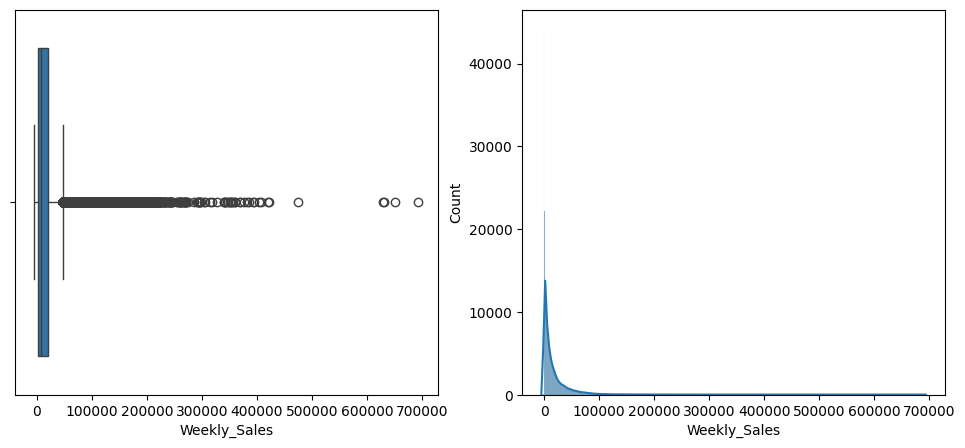

In [28]:
# Weekly_Sales
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Weekly_Sales')
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Weekly_Sales', kde=True)
plt.show()

**Insight**
- Outliers can be observed after 100000 sales

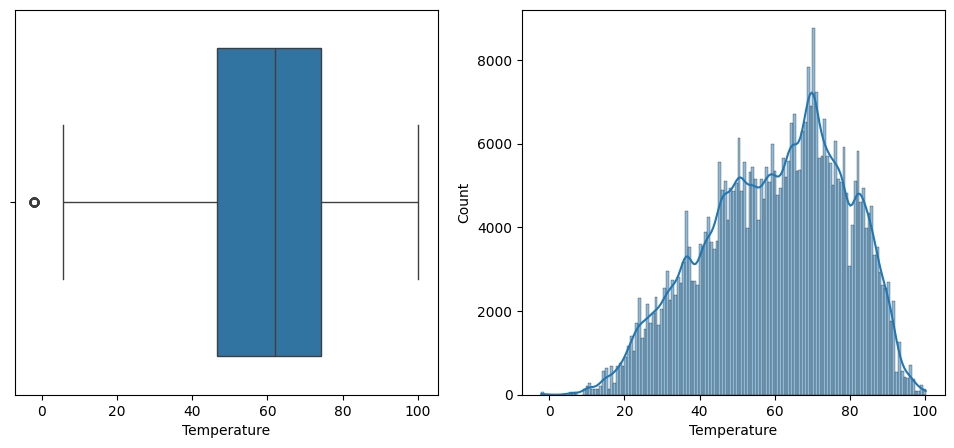

In [29]:
# Temperature
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Temperature')
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Temperature', kde=True)
plt.show()

**Insight**
- Outliers can be observed at temperature 10.

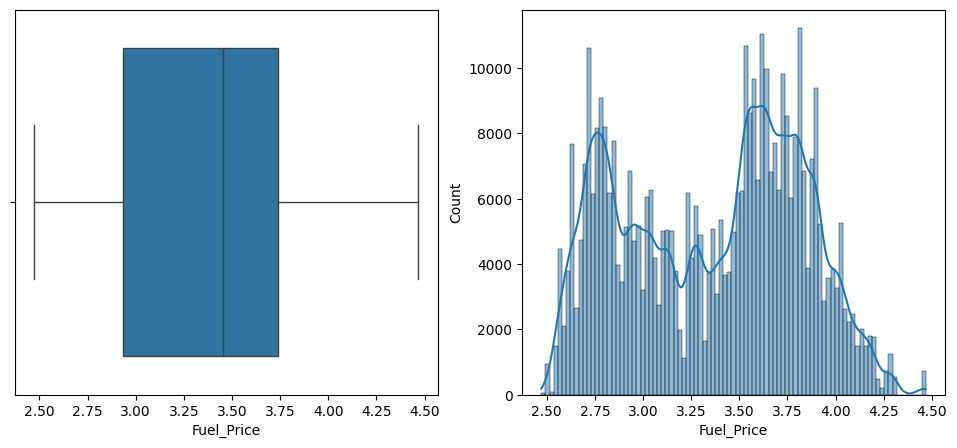

In [30]:
# Fuel_Price
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Fuel_Price')
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Fuel_Price', kde=True)
plt.show()

**Insight**
- There are no observable outliers.

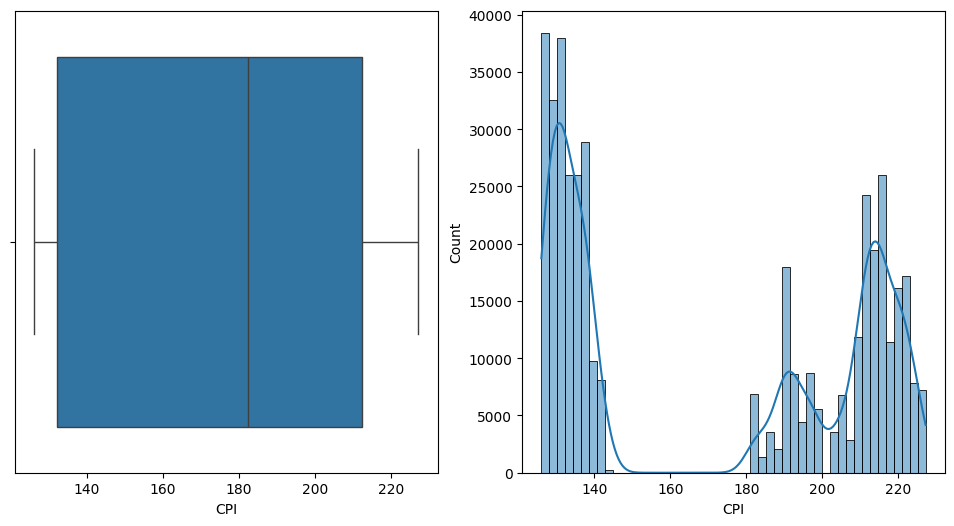

In [31]:
# CPI
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='CPI')
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='CPI', kde=True)
plt.show()

**Insight**
- No observable outliers.
- There's an observable gap in CPI distribution.

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

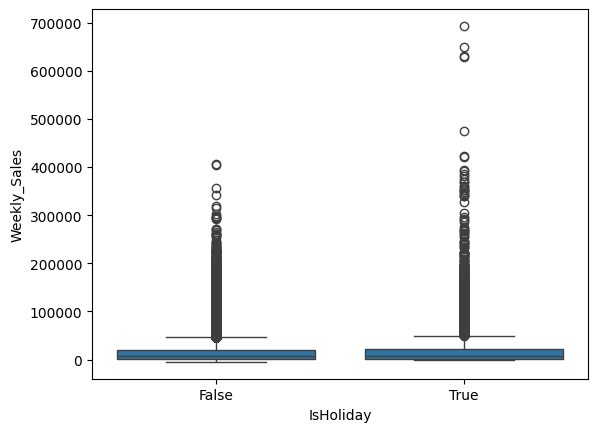

In [32]:
# Normal weeks vs holiday weeks
sns.boxplot(data=df, x='IsHoliday', y='Weekly_Sales')

**Insight**
- Sales are higher on holiday weeks.

### Outliers Handling

In [33]:
# Weekly_Sales - capping upper outliers
Q1_sales = df['Weekly_Sales'].quantile(0.25)
Q3_sales = df['Weekly_Sales'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales
upper_bound_sales = Q3_sales + 1.5 * IQR_sales

# Cap values above the upper bound
df['Weekly_Sales'] = np.where(df['Weekly_Sales'] > upper_bound_sales, upper_bound_sales, df['Weekly_Sales'])

print(f"Weekly_Sales outliers capped. New max value: {df['Weekly_Sales'].max()}")

Weekly_Sales outliers capped. New max value: 47395.15625


In [34]:
# Temperature - delete outliers
Q1_temp = df['Temperature'].quantile(0.25)
Q3_temp = df['Temperature'].quantile(0.75)
IQR_temp = Q3_temp - Q1_temp
lower_bound_temp = Q1_temp - 1.5 * IQR_temp
upper_bound_temp = Q3_temp + 1.5 * IQR_temp

df_filtered_temp = df[(df['Temperature'] >= lower_bound_temp) & (df['Temperature'] <= upper_bound_temp)]

print(f"Shape before removing Temperature outliers: {df.shape}")
print(f"Shape after removing Temperature outliers: {df_filtered_temp.shape}")
df = df_filtered_temp.copy()

Shape before removing Temperature outliers: (421570, 16)
Shape after removing Temperature outliers: (421501, 16)


### Verification

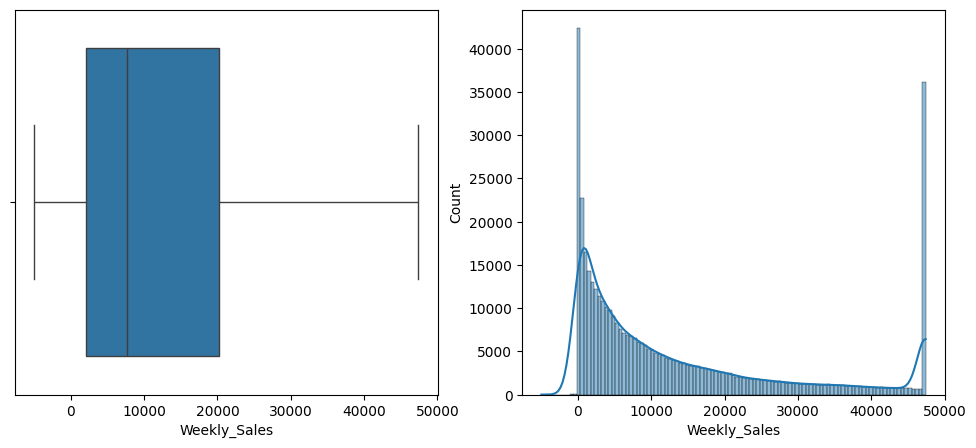

In [35]:
# Weekly_Sales
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Weekly_Sales')
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Weekly_Sales', kde=True)
plt.show()

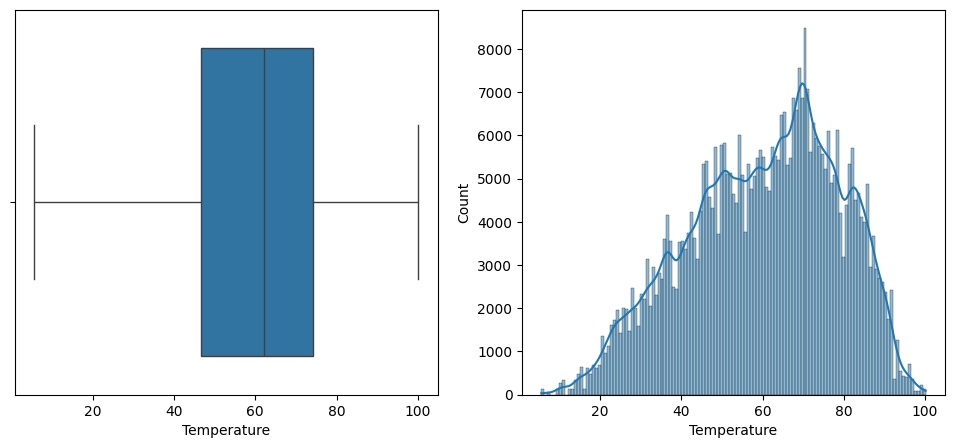

In [36]:
# Temperature
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Temperature')
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Temperature', kde=True)
plt.show()

## Univariate Analysis
Task 4 — Univariate Analysis
Perform univariate analysis (one variable at a time):
1. Weekly sales distribution (Histogram + KDE).
2. Store type distribution (Count plot).
3. Distribution of Temperature, Fuel Price, CPI, Unemployment.
4. Distribution of sales during:
  - Holiday weeks
  - Non-holiday weeks
5. Identify top 10 departments by average weekly sales.

<Axes: xlabel='Weekly_Sales', ylabel='Count'>

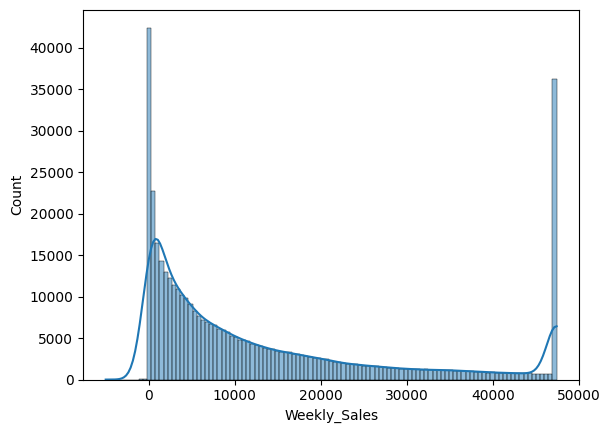

In [37]:
# Weekly sales distribution
sns.histplot(data=df, x='Weekly_Sales', kde=True)

<Axes: xlabel='Type', ylabel='count'>

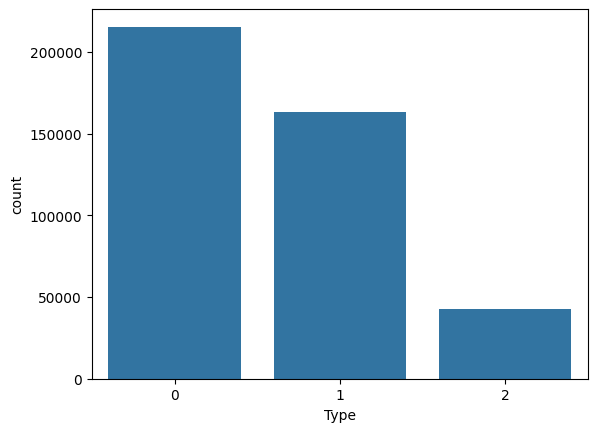

In [38]:
# store types distribution
sns.countplot(data=df, x='Type')

<Axes: xlabel='Temperature', ylabel='Count'>

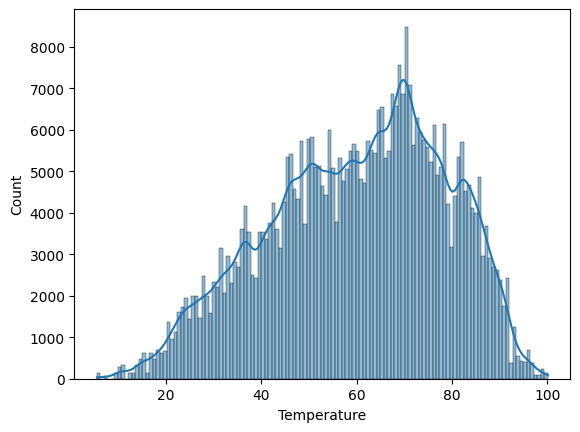

In [39]:
# distribution of Temperature
sns.histplot(data=df, x='Temperature', kde=True)

<Axes: xlabel='Fuel_Price', ylabel='Count'>

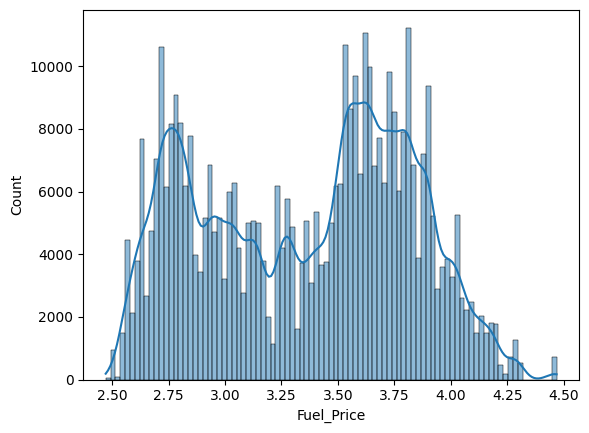

In [40]:
# distribution of Fuel
sns.histplot(data=df, x='Fuel_Price', kde=True)

<Axes: xlabel='CPI', ylabel='Count'>

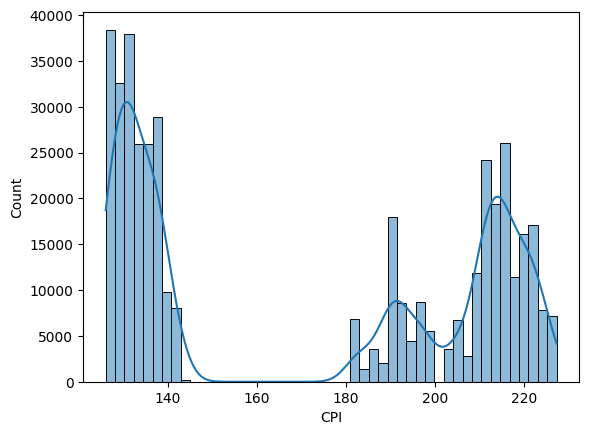

In [41]:
# distribution of CPI
sns.histplot(data=df, x='CPI', kde=True)

<Axes: xlabel='Unemployment', ylabel='Count'>

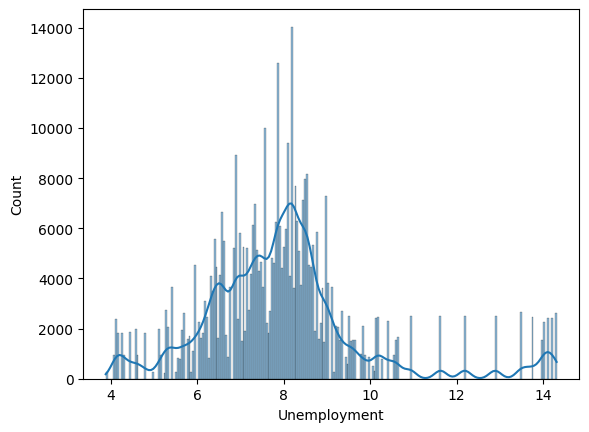

In [42]:
# distribution of unemployment
sns.histplot(data=df, x='Unemployment', kde=True)

<Axes: xlabel='Weekly_Sales'>

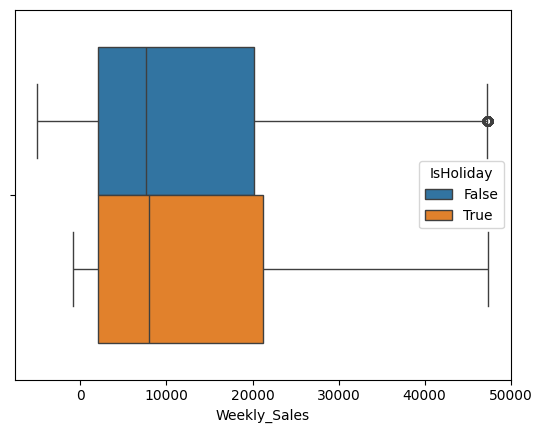

In [43]:
# distribution of sales during holiday weeks and non-holiday weeks
sns.boxplot(data=df, x='Weekly_Sales', hue='IsHoliday')

In [44]:
# top 10 departments by avg weekly sales
df.groupby('Dept')['Weekly_Sales'].mean().sort_values(ascending=False).head(10)

,Weekly_Sales
Dept,
38,43804.596664
65,43653.987142
95,42366.828283
92,40204.835648
40,36997.230022
72,35465.479884
2,34883.538453
90,32361.487457
13,28971.202459


## Bivariate Analysis
Task 5 — Bivariate Analysis
Study the relationship between two variables:
1. Relationship between Temperature & Weekly Sales (scatter plot).
2. Relationship between Fuel Price & Weekly Sales.
3. Weekly Sales vs. Store Type.
4. Weekly Sales vs. Holiday_Flag.
5. Compare sales between:
  - Top-performing store
  - Lowest-performing store

In [45]:
df.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Type', 'Size', 'Dept', 'Weekly_Sales'],
      dtype='object')

<Axes: xlabel='Temperature', ylabel='Weekly_Sales'>

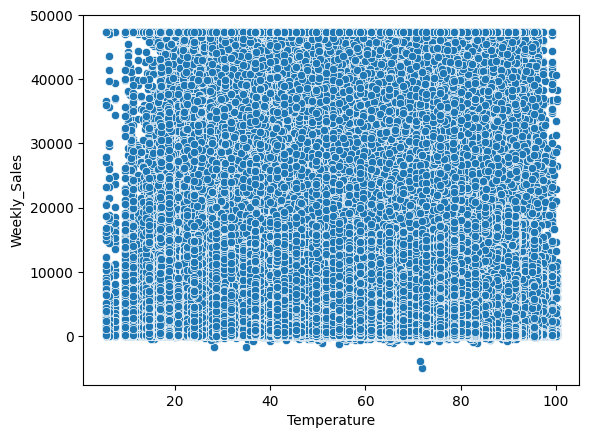

In [46]:
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales')

<Axes: xlabel='Fuel_Price', ylabel='Weekly_Sales'>

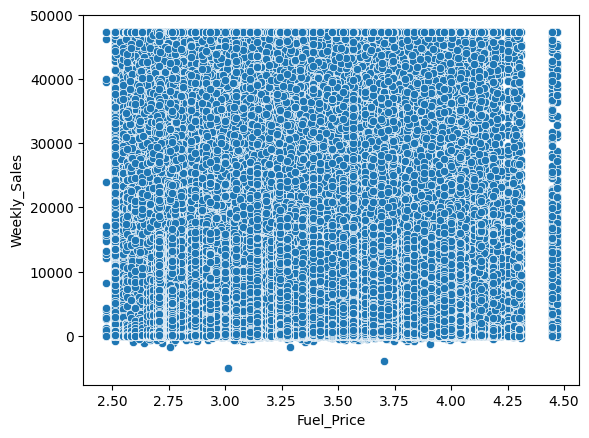

In [47]:
sns.scatterplot(data=df, x='Fuel_Price', y='Weekly_Sales')

<Axes: xlabel='Type', ylabel='Weekly_Sales'>

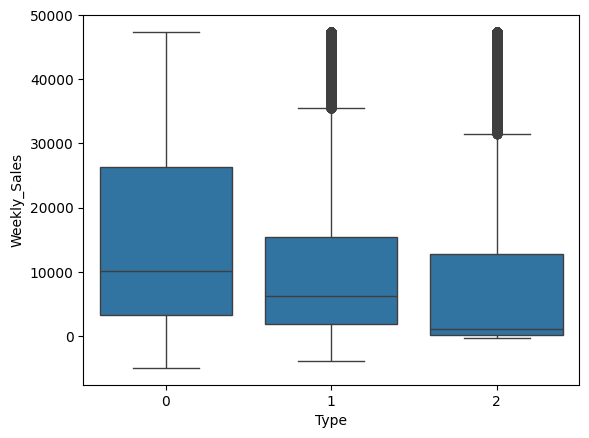

In [48]:
sns.boxplot(data=df, x='Type', y='Weekly_Sales')

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

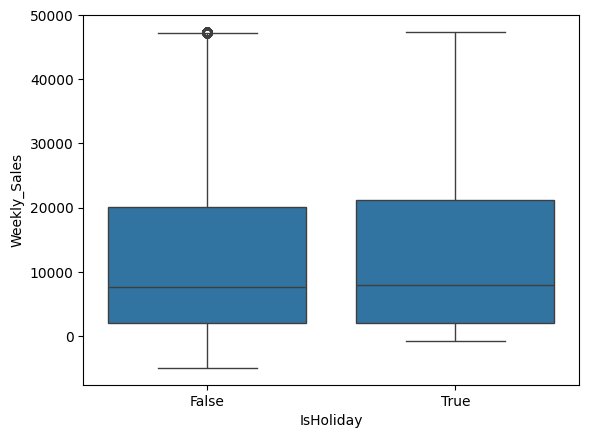

In [49]:
sns.boxplot(data=df, x='IsHoliday', y='Weekly_Sales')

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

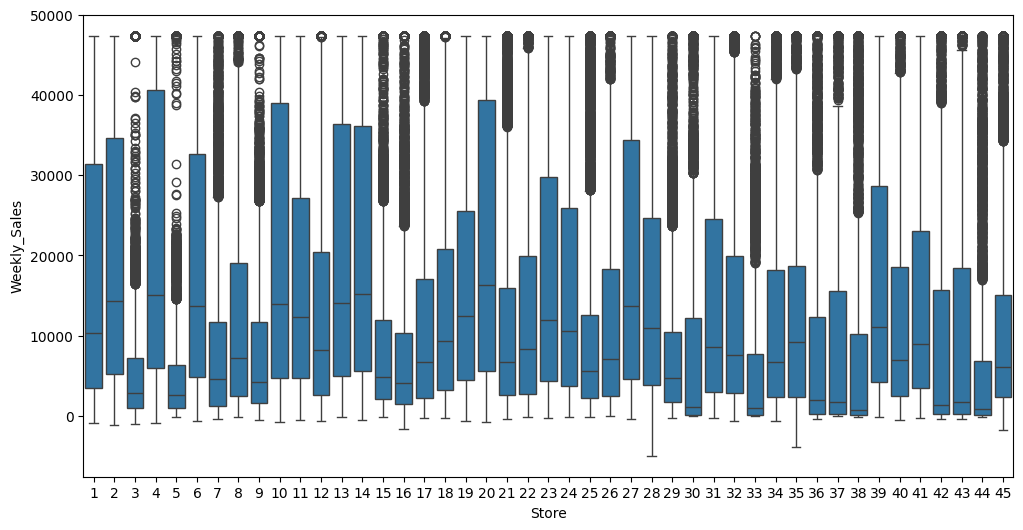

In [51]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Store', y='Weekly_Sales')

## Multivariate Analysis
Task 6 — Multivariate Analysis
Analyze more than two variables together:
1. Create a correlation heatmap for all numeric features.
2. Analyze store-level sales using:
  - Store Type
  - Store Size
  - Weekly Sales
3. Multivariate relationship:
  - Weekly Sales vs Temperature vs Holiday_Flag (3-variable plot or grouped summary)
4. Analyze whether discount markdowns influence sales when considering:
  - Date
  - Holiday weeks
  - Markdown values

<Axes: >

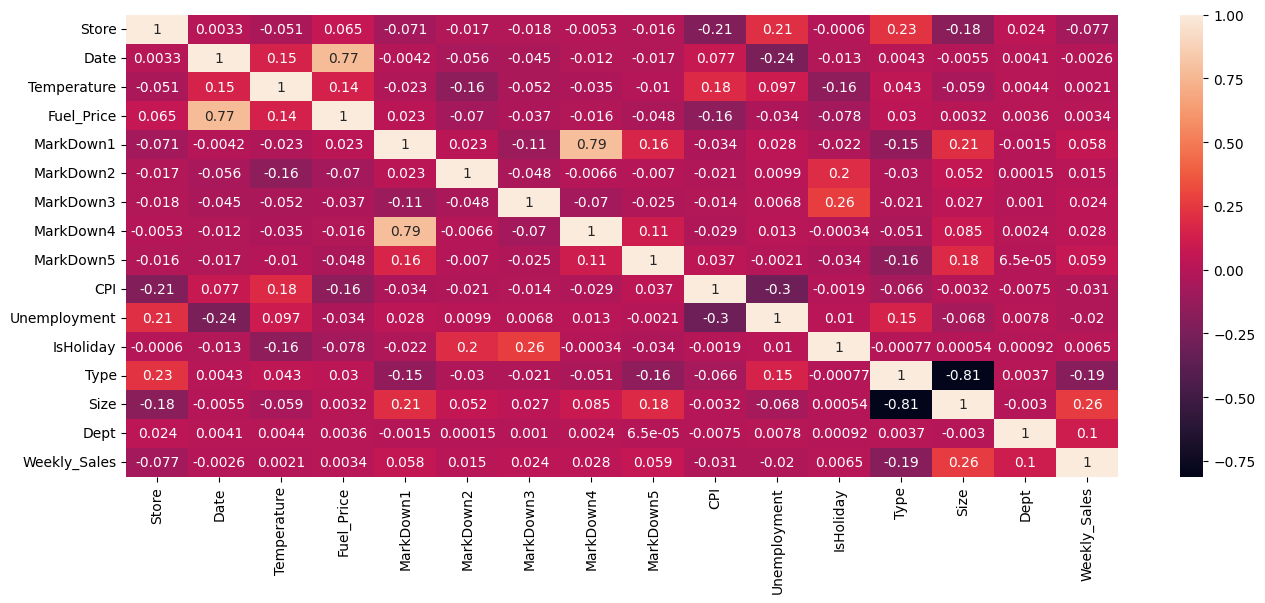

In [54]:
# correlation heatmap for all numeric variables
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

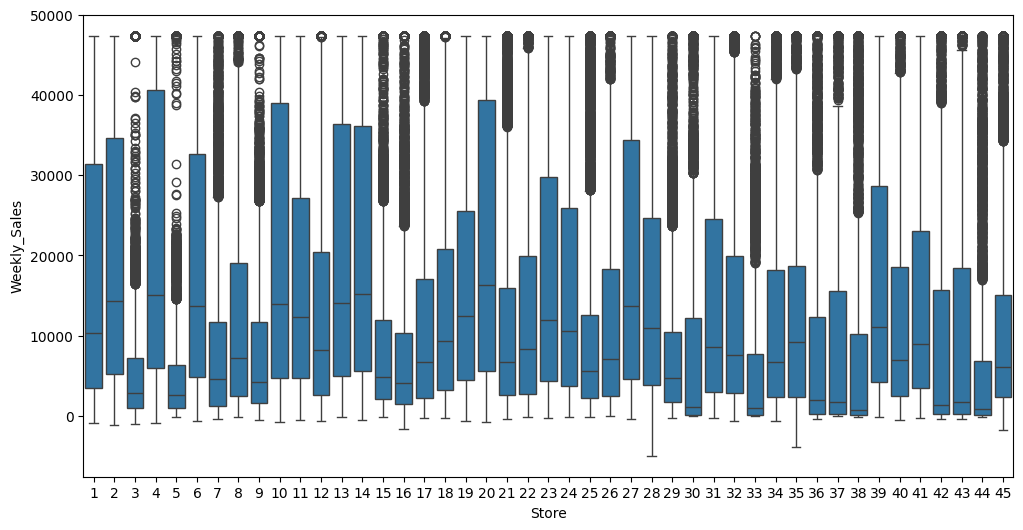

In [55]:
# store level sales
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Store', y='Weekly_Sales')

## Time Series Analysis
Task 7 — Time Series Analysis
1. Convert Date to:
  - Year
  - Month
  - Week
2. Plot total weekly sales over time.
3. Plot monthly sales trends for:
  - Store with highest sales
  - Store with lowest sales
4. Identify seasonal patterns:
  - Which months show peak sales?
  - Which departments show seasonal demand?

## Feature Engineering
Task 8 — Feature Engineering

Task 8A — Create New Columns
1. year, month, week → from date.
2. discount_effect = MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5
3. is_peak_season → True if month in {11, 12}.
4. normalized_sales = Weekly_Sales / Size


Task 8B — Filter Using Created Columns
1. Show all peak-season transactions where weekly_sales > 50,000.
2. Show all stores whose normalized_sales is in the top 10% percentile.
3. Show departments where discount_effect > median discount.
4. Filter rows where:
  - Temperature < 40
  - Fuel price > 3.5
  - Weekly sales between 20,000 and 60,000
  - is_peak_season = True


Task 8C — Grouping & Business Insights
1. Monthly average sales per store.
2. Total discount_effect per department.
3. Department with highest normalized_sales.
4. Compute store-wise revenue potential:
  - revenue_potential = Weekly_Sales * 52
5. Identify top 10 stores based on revenue potential.


### Creating New Columns

In [65]:
# year, month, week from Date column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

In [66]:
# discount_effect
df['discount_effect'] = df['MarkDown1'] + df['MarkDown2'] + df['MarkDown3'] + df['MarkDown4'] + df['MarkDown5']

In [67]:
# peak season
df['is_peak_season'] = df['Month'].isin([11, 12])

In [68]:
# normalized sales
df['normalized_sales'] = df['Weekly_Sales'] / df['Size']

### Filtering Using Created Columns

In [75]:
# peak season transitions
df[(df['Weekly_Sales'] > 40000)][['Store', 'Type', 'Dept', 'Weekly_Sales']]

,Store,Type,Dept,Weekly_Sales
1,1,0,2,47395.15625
7,1,0,8,40129.01000
12,1,0,13,41969.29000
36,1,0,38,47395.15625
37,1,0,40,47395.15625
...,...,...,...,...
421497,45,1,92,47395.15625
421500,45,1,95,47395.15625
421538,45,1,38,47395.15625
421564,45,1,92,47395.15625


In [82]:
# stores whose normalized_sales in top 10 percentile
top_10_percentile = df['normalized_sales'].quantile(0.9)
# df[df['normalized_sales'] >= top_10_percentile][['Store', 'Type', 'Dept', 'normalized_sales']]
df[df['normalized_sales'] >= top_10_percentile]['Store'].unique()

array([ 1,  3,  5,  7,  8,  9, 10, 12, 15, 16, 17, 18, 21, 22, 23, 25, 26,
       29, 30, 33, 34, 35, 36, 37, 38, 40, 42, 43, 44, 45])

In [84]:
#   departments where discount_effect > median
df[df['discount_effect'] > df['discount_effect'].median()]['Dept'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 48, 49, 52, 54, 55, 56, 58, 59,
       60, 67, 71, 72, 74, 79, 80, 81, 82, 83, 85, 87, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 77, 99, 47, 78, 51, 50, 43, 39, 65])

In [85]:
# temperature < 40
df[df['Temperature'] < 40].head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Type,Size,Dept,Weekly_Sales,Year,Month,Week,discount_effect,is_peak_season,normalized_sales
73,1,2010-02-12,38.51,2.548,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.24217,...,0,151315,1,46039.49,2010,2,6,20032.613536,False,0.304263
74,1,2010-02-12,38.51,2.548,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.24217,...,0,151315,2,44682.74,2010,2,6,20032.613536,False,0.295296
75,1,2010-02-12,38.51,2.548,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.24217,...,0,151315,3,10887.84,2010,2,6,20032.613536,False,0.071955
76,1,2010-02-12,38.51,2.548,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.24217,...,0,151315,4,35351.21,2010,2,6,20032.613536,False,0.233627
77,1,2010-02-12,38.51,2.548,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.24217,...,0,151315,5,29620.81,2010,2,6,20032.613536,False,0.195756


In [86]:
# fuel price > 3.5
df[df['Fuel_Price'] > 3.5].head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Type,Size,Dept,Weekly_Sales,Year,Month,Week,discount_effect,is_peak_season,normalized_sales
4306,1,2011-04-01,59.17,3.524,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,214.837166,...,0,151315,1,20398.09,2011,4,13,20032.613536,False,0.134805
4307,1,2011-04-01,59.17,3.524,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,214.837166,...,0,151315,2,46991.58,2011,4,13,20032.613536,False,0.310555
4308,1,2011-04-01,59.17,3.524,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,214.837166,...,0,151315,3,8734.19,2011,4,13,20032.613536,False,0.057722
4309,1,2011-04-01,59.17,3.524,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,214.837166,...,0,151315,4,34451.90,2011,4,13,20032.613536,False,0.227683
4310,1,2011-04-01,59.17,3.524,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,214.837166,...,0,151315,5,23598.55,2011,4,13,20032.613536,False,0.155956


In [90]:
# weekly sales between 20000 and 60000
df[df['Weekly_Sales'].between(20000, 60000, inclusive='both')].head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Type,Size,Dept,Weekly_Sales,Year,Month,Week,discount_effect,is_peak_season,normalized_sales
0,1,2010-02-05,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,...,0,151315,1,24924.50000,2010,2,5,20032.613536,False,0.164719
1,1,2010-02-05,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,...,0,151315,2,47395.15625,2010,2,5,20032.613536,False,0.313222
3,1,2010-02-05,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,...,0,151315,4,39954.04000,2010,2,5,20032.613536,False,0.264045
4,1,2010-02-05,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,...,0,151315,5,32229.38000,2010,2,5,20032.613536,False,0.212995
6,1,2010-02-05,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,...,0,151315,7,21084.08000,2010,2,5,20032.613536,False,0.139339


In [92]:
# peak season
df[df['is_peak_season'] == True].head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Type,Size,Dept,Weekly_Sales,Year,Month,Week,discount_effect,is_peak_season,normalized_sales
2797,1,2010-11-05,58.74,2.689,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.956394,...,0,151315,1,34238.88,2010,11,44,20032.613536,True,0.226276
2798,1,2010-11-05,58.74,2.689,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.956394,...,0,151315,2,46381.43,2010,11,44,20032.613536,True,0.306522
2799,1,2010-11-05,58.74,2.689,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.956394,...,0,151315,3,9825.22,2010,11,44,20032.613536,True,0.064932
2800,1,2010-11-05,58.74,2.689,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.956394,...,0,151315,4,37980.55,2010,11,44,20032.613536,True,0.251003
2801,1,2010-11-05,58.74,2.689,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.956394,...,0,151315,5,23903.81,2010,11,44,20032.613536,True,0.157974


### Grouping and Business Insights

In [93]:
# Monthly average sales per store
df.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [98]:
df.groupby(['Store', 'Month'])['Weekly_Sales'].mean()

Store  Month
1      1        15591.797795
       2        17797.605854
       3        17503.877781
       4        17390.586515
       5        17397.402755
                    ...     
45     8        10738.543140
       9        10511.986047
       10       10793.750879
       11       11990.990012
       12       14323.506688
Name: Weekly_Sales, Length: 540, dtype: float64

In [100]:
# total discount effect per department
df.groupby('Dept')['discount_effect'].sum().head()

,discount_effect
Dept,
1,1.270257e+08
2,1.270257e+08
3,1.270257e+08
4,1.270257e+08
5,1.252629e+08


In [101]:
# department with highest normalized sales
df.groupby('Dept')['normalized_sales'].mean().sort_values(ascending=False)

,normalized_sales
Dept,
38,0.470792
95,0.437406
92,0.416718
40,0.327037
90,0.323679
...,...
51,0.000179
39,0.000061
78,0.000048


In [104]:
# store wise revenue potential
df['revenue_potential'] = df['Weekly_Sales'] * 52

In [105]:
# top 10 stores based on revenue potential
df.groupby('Store')['revenue_potential'].sum().sort_values(ascending=False).head(10)

,revenue_potential
Store,
4,1.141682e+10
20,1.134246e+10
13,1.099768e+10
10,1.090585e+10
2,1.069968e+10
14,1.065140e+10
27,1.041325e+10
6,1.008285e+10
23,9.366270e+09


## Extract Cleaned Dataset

In [106]:
df.to_csv('drive/MyDrive/Tek works/Exported Datasets/walmart_sales_dataset_cleaned.csv')